<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/12_Torch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
torch.manual_seed(42) # similar to random_state in tf, random number to initialize randomness
# ensures that same randomness happens everytime when parallel models are running
# PYTORCH IS BUILT FOR CLUSTERS 
# PYTORCH much more similar to NumPy 
# TF is not just for DL, it is for MATH , just like PyTorch 


In [4]:
# Torch -> Dynamic Computing Graph + functions and prebuilt models
# TF -> Directed Acyclic Graph 
data = [[2,342,-42],[1,2,3]]
v = torch.tensor(data)
v # tf representation -> [ [1], [2], [3]]

tensor([[  2, 342, -42],
        [  1,   2,   3]])

In [5]:
v.shape

torch.Size([2, 3])

In [10]:
data = [[[1.,2.],[2,3]],[[42,42],[-1,-1]]]
v = torch.tensor(data)
print(v)
print(v.shape) # tf -> variable dimension sized tensors
# since this is meant for DL, and nn ip is hardcoded, this works for us!

tensor([[[ 1.,  2.],
         [ 2.,  3.]],

        [[42., 42.],
         [-1., -1.]]])
torch.Size([2, 2, 2])


In [17]:
# get any scalar out of it
print(v[0][0][1])
# get any number out of it
print(v[0][0][1].item())

tensor(2.)
2.0


In [20]:
x = torch.randn((1,2,3)) # tuple passed for size of tensor
x

tensor([[[ 0.3783,  1.7652,  0.1254],
         [-1.5088,  1.7508,  1.7792]]])

In [22]:
# TENSORs are for math!
a = torch.tensor([1.,2.,3.])
b = torch.tensor([3.,2.,1.])
z = a+b
y = a-b
x = a*b
w = a/b 
print(w)
print(x)
print(y)
print(z)


tensor([0.3333, 1.0000, 3.0000])
tensor([3., 4., 3.])
tensor([-2.,  0.,  2.])
tensor([4., 4., 4.])


In [25]:
# MATRICES RULES APPLY 
a = torch.tensor([1.,2.,3.,4.])
b = torch.tensor([3.,2.,1.])
c = torch.cat([a,b]) # concatenate
c-1 # still tensors

tensor([0., 1., 2., 3., 2., 1., 0.])

In [30]:
# MATRICES RULES APPLY 
a = torch.randn(2,1)
b = torch.randn(2,3)
c = torch.cat([a,b], 1) # concatenation of diff sizes along an AXIS 
print(a)
print(b)
print(c) # still tensors

tensor([[-0.6912],
        [ 0.3082]])
tensor([[ 0.4275,  0.7243, -0.2954],
        [-0.1840,  0.6900, -0.8083]])
tensor([[-0.6912,  0.4275,  0.7243, -0.2954],
        [ 0.3082, -0.1840,  0.6900, -0.8083]])


In [31]:
c.shape

torch.Size([2, 4])

In [41]:
# reshape tensors into any size neurals need
print(c.view(2,2,2))

tensor([[[-0.6912,  0.4275],
         [ 0.7243, -0.2954]],

        [[ 0.3082, -0.1840],
         [ 0.6900, -0.8083]]])


In [43]:
x = torch.randn(2,3,4)
print(x)
print(x.view(2,-1)) # -1 -> infer the size yourself, mr computer

tensor([[[-0.2847, -1.3338, -0.4887,  0.2118],
         [-0.5269,  0.2512,  0.0330, -0.1701],
         [ 0.9434,  0.8822,  0.0876, -0.7372]],

        [[ 0.3701, -1.0297,  0.0140, -0.2083],
         [-0.8440,  0.3626,  1.1649,  1.2681],
         [ 1.3787, -0.1720, -1.3166,  0.3852]]])
tensor([[-0.2847, -1.3338, -0.4887,  0.2118, -0.5269,  0.2512,  0.0330, -0.1701,
          0.9434,  0.8822,  0.0876, -0.7372],
        [ 0.3701, -1.0297,  0.0140, -0.2083, -0.8440,  0.3626,  1.1649,  1.2681,
          1.3787, -0.1720, -1.3166,  0.3852]])


In [0]:
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [63]:
# track objects as they are created
x = torch.tensor([1.,2.,3.], requires_grad=True) # Starts recording objects
y = torch.tensor([3.,2.,1.], requires_grad=True)
z = x + y # THis is a node that is connecting two nodes, this is just a math operation
# NO BACKPROP CAN HAPPEN ON SUCH A NODE 
print(z)
print(z.grad_fn) # Z knows that X and Y created it. This track-record is the below address
s = z.sum()
print(s.grad_fn)
# Gradient function is DIFFERENTIATION on existing data which gives you the slope
# SLOPE is the direction in which to travel! 

tensor([4., 4., 4.], grad_fn=<AddBackward0>)


In [56]:
print(x.grad) # FOrward prop happened when you did z.sum() but no back_prop happened
# that is why no weights or biases have been adjusted yet 
# to adjust them, new gradients from the learning are required. This requires Gradient Descent going backwords
# into the network-> this will create new values for GRADIENTS, which in turn will readjust weights and biases



None


In [66]:
s.backward() # backprop running from S. THIS WILL ALSO EXECUTE THE NETWORK. 
# My network became s->z->(x,y)
print(x.grad)
print(y.grad)
print(x)
print(y)

tensor([2., 2., 2.])
tensor([2., 2., 2.])
tensor([1., 2., 3.], requires_grad=True)
tensor([3., 2., 1.], requires_grad=True)


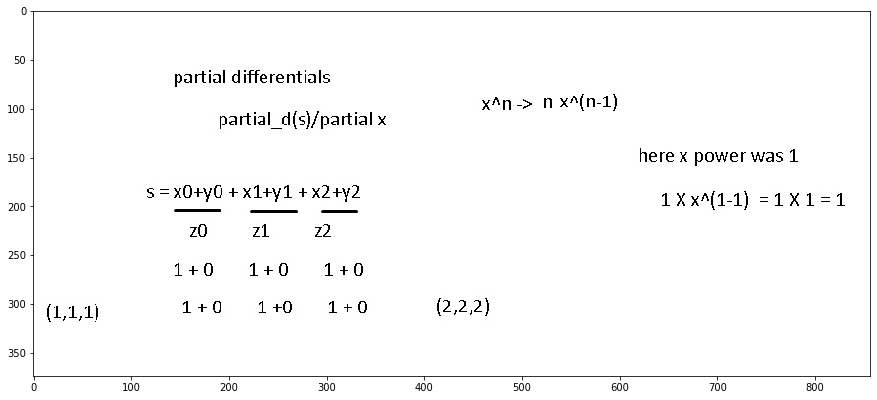

In [71]:
# y = weights * x + bias
# weights and bias is updated via Gradients learnt from Gradient Descent 
# PARTIAL DIFFERNTIATION 
import matplotlib.pyplot as plt
import cv2
x = cv2.imread('pd.jpg')
plt.figure(figsize=(15,10))
plt.imshow(x)